# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [27]:
df = pd.read_csv('vietnam_housing_dataset.csv')
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [6]:
data.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Address            30229 non-null  object
 1   Area               30229 non-null  object
 2   Frontage           30229 non-null  object
 3   Access Road        30229 non-null  object
 4   House direction    30229 non-null  object
 5   Balcony direction  30229 non-null  object
 6   Floors             30229 non-null  object
 7   Bedrooms           30229 non-null  object
 8   Bathrooms          30229 non-null  object
 9   Legal status       30229 non-null  object
 10  Furniture state    30229 non-null  object
 11  Price              30229 non-null  object
dtypes: object(12)
memory usage: 2.8+ MB


In [36]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [37]:
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,4.5,6.0,Đông - Nam,Đông - Nam,4.0,3.0,3.0,Have certificate,Full,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.5,6.0,Đông - Nam,Đông - Nam,5.0,3.0,3.0,Have certificate,Full,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,Full,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,6.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,Đông - Nam,Đông - Nam,1.0,3.0,2.0,Have certificate,Full,4.60
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,4.5,6.0,Đông - Nam,Đông - Nam,5.0,3.0,3.0,Have certificate,Full,4.70
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,3.0,3.0,3.0,Have certificate,Basic,7.50
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,4.5,8.0,Đông - Nam,Đông - Nam,4.0,3.0,3.0,Have certificate,Full,9.50


In [33]:
categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           30229 non-null  float64
 3   Access Road        30229 non-null  float64
 4   House direction    30229 non-null  object 
 5   Balcony direction  30229 non-null  object 
 6   Floors             30229 non-null  float64
 7   Bedrooms           30229 non-null  float64
 8   Bathrooms          30229 non-null  float64
 9   Legal status       30229 non-null  object 
 10  Furniture state    30229 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [38]:
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,4.5,6.0,Đông - Nam,Đông - Nam,4.0,3.0,3.0,Have certificate,Full,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.5,6.0,Đông - Nam,Đông - Nam,5.0,3.0,3.0,Have certificate,Full,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,Full,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,6.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,Đông - Nam,Đông - Nam,1.0,3.0,2.0,Have certificate,Full,4.60
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,4.5,6.0,Đông - Nam,Đông - Nam,5.0,3.0,3.0,Have certificate,Full,4.70
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,3.0,3.0,3.0,Have certificate,Basic,7.50
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,4.5,8.0,Đông - Nam,Đông - Nam,4.0,3.0,3.0,Have certificate,Full,9.50


In [39]:
df.isnull().sum()

Address              0
Area                 0
Frontage             0
Access Road          0
House direction      0
Balcony direction    0
Floors               0
Bedrooms             0
Bathrooms            0
Legal status         0
Furniture state      0
Price                0
dtype: int64

In [40]:
df.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,30229.000000,30229.000000,30229.000000,30229.000000,30229.000000,30229.000000
mean,68.498741,5.032055,7.038359,3.361507,3.423765,3.265672,5.872078
std,48.069835,3.440693,5.652009,1.254256,1.207520,1.234208,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,6.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


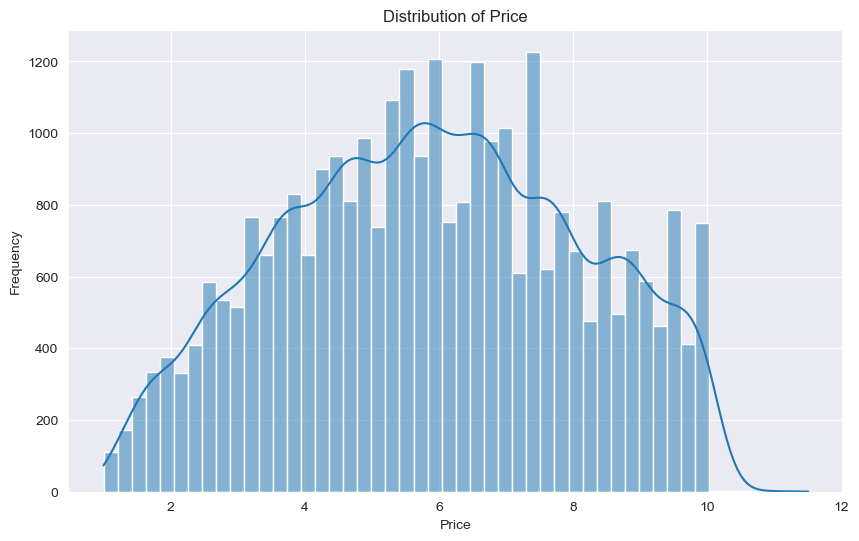

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

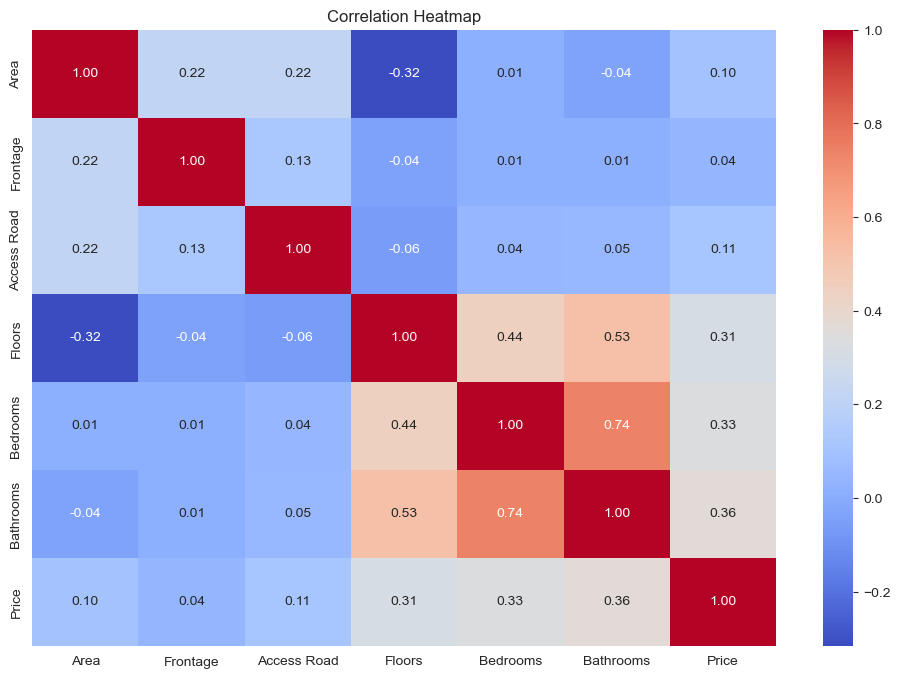

In [53]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()